In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt 
import numpy as np

In [2]:

def create_model(init):
    model = Sequential()
    model.add(Dense(100, input_shape = [28*28, ], init = init, activation = 'tanh'))
    model.add(Dense(100, init = init, activation = 'tanh'))
    model.add(Dense(100, init = init, activation = 'tanh'))
    model.add(Dense(100, init = init, activation = 'tanh'))
    model.add(Dense(10, init = init, activation = 'softmax'))
    return model


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
X_train = x_train.reshape([-1,28*28]) / 255
X_test = x_test.reshape([-1,28*28]) / 255

uniform_model = create_model('uniform')
uniform_model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
history = uniform_model.fit(x = X_train,y = Y_train,batch_size = 64,
     nb_epoch = 30, verbose = 0 , validation_data = (X_test, Y_test))
    

W0722 15:37:13.281854 139851676211008 deprecation_wrapper.py:119] From /home/hacket/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/home/hacket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_shape=[784], activation="tanh", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
W0722 15:37:13.319573 139851676211008 deprecation_wrapper.py:119] From /home/hacket/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 15:37:13.326216 139851676211008 deprecation_wrapper.py:119] From /home/hacket/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform ins

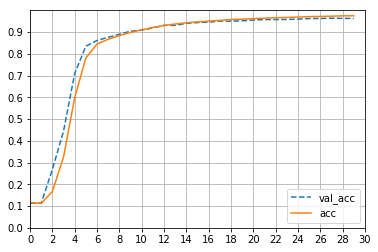

In [19]:
plt.plot(history.history['val_acc'],'--')
plt.plot(history.history['acc'] )
plt.legend(['val_acc' , 'acc'])
plt.yticks(np.arange(0,1,0.1))
plt.xticks(np.arange(0,31,2))
plt.xlim(0,30)
plt.ylim(0,1)
plt.grid()
plt.show()